In [ ]:
!cp /content/drive/MyDrive/propotion.csv /content/dataset_13.csv

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('dataset_13.csv')#13 means going to make 13 features from 85 in dataset

In [ ]:
print('Number of rows'+str(df.count()))
df.head()

Number of rowsUnnamed: 0    1083995
Flow ID       1083995
Src IP        1083995
Src Port      1083995
Dst IP        1083995
               ...   
Idle Mean     1083995
Idle Std      1083995
Idle Max      1083995
Idle Min      1083995
Label         1083995
Length: 85, dtype: int64


,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,...,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,192.168.100.150-192.168.100.3-54088-80-6,192.168.100.150,54088,192.168.100.3,80,6,04/06/2018 09:02:01 AM,5005025,4,4,757.0,494.0,757.0,0.0,189.25,378.5,494.0,0.0,123.5,247.0,249.948801,1.598394,715003.571429,1.891259e+06,5003976.0,41.0,1049.0,349.666667,447.906612,865.0,54.0,5004950.0,1.668317e+06,2.888814e+06,5004032.0,150.0,0,0,0,...,0.0,757.0,139.000000,283.548056,80399.500000,1,2,0,2,7,0,0,0,1.0,156.375,189.25,123.5,0,0,0,0,0,0,0,94,0,61,29200,239,1,32,1049.0,0.0,1049.0,1049.0,7.640515e+14,1.080532e+15,1.528103e+15,5003976.0,DDoS_HTTP
1,1,192.168.100.150-192.168.100.3-54092-80-6,192.168.100.150,54092,192.168.100.3,80,6,04/06/2018 09:02:01 AM,5003987,4,4,570.0,494.0,570.0,0.0,142.50,285.0,494.0,0.0,123.5,247.0,212.630448,1.598725,714855.285714,1.890986e+06,5003208.0,19.0,779.0,259.666667,370.216603,687.0,36.0,5003968.0,1.667989e+06,2.888404e+06,5003231.0,108.0,0,0,0,...,0.0,570.0,118.222222,235.358120,55393.444444,1,2,0,2,7,0,0,0,1.0,133.000,142.50,123.5,0,0,0,0,0,0,0,71,0,61,29200,236,1,32,779.0,0.0,779.0,779.0,7.640515e+14,1.080532e+15,1.528103e+15,5003208.0,DDoS_HTTP
2,2,192.168.100.150-192.168.100.3-54090-80-6,192.168.100.150,54090,192.168.100.3,80,6,04/06/2018 09:02:01 AM,5004541,4,4,423.0,494.0,423.0,0.0,105.75,211.5,494.0,0.0,123.5,247.0,183.233587,1.598548,714934.428571,1.891074e+06,5003487.0,3.0,1054.0,351.333333,220.302822,498.0,98.0,5004508.0,1.668169e+06,2.888532e+06,5003559.0,423.0,0,0,0,...,0.0,494.0,101.888889,202.957166,41191.611111,1,2,0,2,7,0,0,0,1.0,114.625,105.75,123.5,0,0,0,0,0,0,0,52,0,61,29200,235,1,32,1054.0,0.0,1054.0,1054.0,7.640515e+14,1.080532e+15,1.528103e+15,5003487.0,DDoS_HTTP
3,3,192.168.100.150-192.168.100.3-54094-80-6,192.168.100.150,54094,192.168.100.3,80,6,04/06/2018 09:02:01 AM,5003664,4,4,410.0,494.0,410.0,0.0,102.50,205.0,494.0,0.0,123.5,247.0,180.667607,1.598828,714809.142857,1.890917e+06,5003005.0,28.0,659.0,219.666667,294.253859,559.0,35.0,5003633.0,1.667878e+06,2.888329e+06,5003033.0,97.0,0,0,0,...,0.0,494.0,100.444444,200.416511,40166.777778,1,2,0,2,7,0,0,0,1.0,113.000,102.50,123.5,0,0,0,0,0,0,0,51,0,61,29200,235,1,32,659.0,0.0,659.0,659.0,7.640515e+14,1.080532e+15,1.528103e+15,5003005.0,DDoS_HTTP
4,4,192.168.100.150-192.168.100.3-54096-80-6,192.168.100.150,54096,192.168.100.3,80,6,04/06/2018 09:02:01 AM,5003007,4,4,478.0,494.0,478.0,0.0,119.50,239.0,494.0,0.0,123.5,247.0,194.283158,1.599038,714715.285714,1.890751e+06,5002535.0,21.0,472.0,157.333333,204.417057,393.0,28.0,5002986.0,1.667662e+06,2.888106e+06,5002560.0,79.0,0,0,0,...,0.0,494.0,108.000000,214.343183,45943.000000,1,2,0,2,7,0,0,0,1.0,121.500,119.50,123.5,0,0,0,0,0,0,0,59,0,61,29200,235,1,32,472.0,0.0,472.0,472.0,7.640515e+14,1.080532e+15,1.528103e+15,5002535.0,DDoS_HTTP


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'DDoS_HTTP'),
 Text(0, 0, 'DDoS_TCP'),
 Text(0, 0, 'DDoS_UDP'),
 Text(0, 0, 'Data_Exfiltration'),
 Text(0, 0, 'DoS_HTTP'),
 Text(0, 0, 'DoS_TCP'),
 Text(0, 0, 'DoS_UDP'),
 Text(0, 0, 'Keylogging'),
 Text(0, 0, 'OS_Scan'),
 Text(0, 0, 'Service_Scan')]

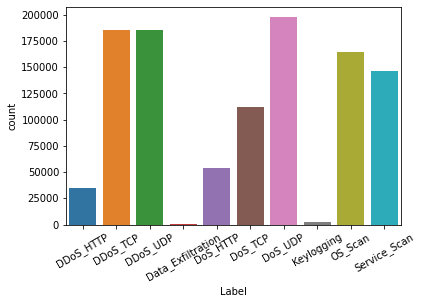

In [ ]:
ax=sns.countplot(df['Label'])
ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=30)

In [ ]:
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
print('After removing nan instances, Now the number of rows is'+str(df.count()))

After removing nan instances, Now the number of rows isUnnamed: 0    1083858
Flow ID       1083858
Src IP        1083858
Src Port      1083858
Dst IP        1083858
               ...   
Idle Mean     1083858
Idle Std      1083858
Idle Max      1083858
Idle Min      1083858
Label         1083858
Length: 85, dtype: int64


In [ ]:
df.iloc[0:2,:30]

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std
0,0,192.168.100.150-192.168.100.3-54088-80-6,192.168.100.150,54088,192.168.100.3,80,6,04/06/2018 09:02:01 AM,5005025,4,4,757.0,494.0,757.0,0.0,189.25,378.5,494.0,0.0,123.5,247.0,249.948801,1.598394,715003.571429,1.891259e+06,5003976.0,41.0,1049.0,349.666667,447.906612
1,1,192.168.100.150-192.168.100.3-54092-80-6,192.168.100.150,54092,192.168.100.3,80,6,04/06/2018 09:02:01 AM,5003987,4,4,570.0,494.0,570.0,0.0,142.50,285.0,494.0,0.0,123.5,247.0,212.630448,1.598725,714855.285714,1.890986e+06,5003208.0,19.0,779.0,259.666667,370.216603


In [ ]:
df.iloc[0:2,30:]

,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,865.0,54.0,5004950.0,1.668317e+06,2.888814e+06,5004032.0,150.0,0,0,0,0,136,136,0.799197,0.799197,0.0,757.0,139.000000,283.548056,80399.500000,1,2,0,2,7,0,0,0,1.0,156.375,189.25,123.5,0,0,0,0,0,0,0,94,0,61,29200,239,1,32,1049.0,0.0,1049.0,1049.0,7.640515e+14,1.080532e+15,1.528103e+15,5003976.0,DDoS_HTTP
1,687.0,36.0,5003968.0,1.667989e+06,2.888404e+06,5003231.0,108.0,0,0,0,0,136,136,0.799363,0.799363,0.0,570.0,118.222222,235.358120,55393.444444,1,2,0,2,7,0,0,0,1.0,133.000,142.50,123.5,0,0,0,0,0,0,0,71,0,61,29200,236,1,32,779.0,0.0,779.0,779.0,7.640515e+14,1.080532e+15,1.528103e+15,5003208.0,DDoS_HTTP


In [ ]:
index_to_delete=df.columns.difference(['Flow IAT Mean','Flow Duration','Flow Packets/s','Flow IAT Max','Fwd Packet Length Max','Total Length of Fwd Packet','Fwd Packet Length Mean','Total Bwd packets', 'Fwd IAT Total','Flow IAT Std','Flow Bytes/s','Total Fwd Packet','Flow IAT Min','Label'])

In [ ]:
print(index_to_delete)
print(index_to_delete.size)#13 features + 1 label so 14 removed from 85-14=> 71

Index(['ACK Flag Count', 'Active Max', 'Active Mean', 'Active Min',
       'Active Std', 'Average Packet Size', 'Bwd Bulk Rate Avg',
       'Bwd Bytes/Bulk Avg', 'Bwd Header Length', 'Bwd IAT Max',
       'Bwd IAT Mean', 'Bwd IAT Min', 'Bwd IAT Std', 'Bwd IAT Total',
       'Bwd Init Win Bytes', 'Bwd PSH Flags', 'Bwd Packet Length Max',
       'Bwd Packet Length Mean', 'Bwd Packet Length Min',
       'Bwd Packet Length Std', 'Bwd Packet/Bulk Avg', 'Bwd Packets/s',
       'Bwd Segment Size Avg', 'Bwd URG Flags', 'CWR Flag Count',
       'Down/Up Ratio', 'Dst IP', 'Dst Port', 'ECE Flag Count',
       'FIN Flag Count', 'FWD Init Win Bytes', 'Flow ID', 'Fwd Act Data Pkts',
       'Fwd Bulk Rate Avg', 'Fwd Bytes/Bulk Avg', 'Fwd Header Length',
       'Fwd IAT Max', 'Fwd IAT Mean', 'Fwd IAT Min', 'Fwd IAT Std',
       'Fwd PSH Flags', 'Fwd Packet Length Min', 'Fwd Packet Length Std',
       'Fwd Packet/Bulk Avg', 'Fwd Packets/s', 'Fwd Seg Size Min',
       'Fwd Segment Size Avg', 'Fwd URG Fl

In [ ]:
df.drop(index_to_delete,axis=1,inplace=True)

In [ ]:
df.iloc[0:3,:]

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Fwd Packet Length Max,Fwd Packet Length Mean,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Label
0,5005025,4,4,757.0,757.0,189.25,249.948801,1.598394,715003.571429,1.891259e+06,5003976.0,41.0,1049.0,DDoS_HTTP
1,5003987,4,4,570.0,570.0,142.50,212.630448,1.598725,714855.285714,1.890986e+06,5003208.0,19.0,779.0,DDoS_HTTP
2,5004541,4,4,423.0,423.0,105.75,183.233587,1.598548,714934.428571,1.891074e+06,5003487.0,3.0,1054.0,DDoS_HTTP


In [ ]:
df=df.dropna()

In [ ]:
df.drop(df.columns[0], axis=1,inplace=True)

In [ ]:
X=df.iloc[:,:-1]
y=df['Label']

In [ ]:
X.iloc[0:3,:]

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Fwd Packet Length Max,Fwd Packet Length Mean,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total
0,5005025,4,4,757.0,757.0,189.25,249.948801,1.598394,715003.571429,1.891259e+06,5003976.0,41.0,1049.0
1,5003987,4,4,570.0,570.0,142.50,212.630448,1.598725,714855.285714,1.890986e+06,5003208.0,19.0,779.0
2,5004541,4,4,423.0,423.0,105.75,183.233587,1.598548,714934.428571,1.891074e+06,5003487.0,3.0,1054.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
X_train.isna().any()

Flow Duration                 False
Total Fwd Packet              False
Total Bwd packets             False
Total Length of Fwd Packet    False
Fwd Packet Length Max         False
Fwd Packet Length Mean        False
Flow Bytes/s                  False
Flow Packets/s                False
Flow IAT Mean                 False
Flow IAT Std                  False
Flow IAT Max                  False
Flow IAT Min                  False
Fwd IAT Total                 False
dtype: bool

# 13 Features


In [ ]:
score_label=['Accuracy','Precision','Recall','F-Measure']

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [ ]:
gnb=BernoulliNB().fit(X_train,y_train)
nb_predictions=gnb.predict(X_test)
print(accuracy_score(y_test,nb_predictions))

0.4971453877807097


In [ ]:
NB_score=accuracy_score(y_test,nb_predictions),precision_score(y_test,nb_predictions,average='macro'),recall_score(y_test,nb_predictions,average='macro'),f1_score(y_test,nb_predictions,average='macro')
NB_metrics=pd.DataFrame(data=[NB_score],columns=score_label)
print(NB_metrics)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   Accuracy  Precision    Recall  F-Measure
0  0.497145   0.235714  0.320936    0.25085


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda=QDA().fit(X_train,y_train)
qda_predictions=qda.predict(X_test)
print(accuracy_score(y_test,qda_predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.4035392024800251


In [ ]:
QDA_score=accuracy_score(y_test,qda_predictions),precision_score(y_test,qda_predictions,average='macro'),recall_score(y_test,qda_predictions,average='macro'),f1_score(y_test,qda_predictions,average='macro')
QDA_metrics=pd.DataFrame(data=[QDA_score],columns=score_label)
print(QDA_metrics)

   Accuracy  Precision    Recall  F-Measure
0  0.403539   0.387569  0.382352   0.306615


In [ ]:
#ID3
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',splitter='best').fit(X_train,y_train)
dt_predictions=dt.predict(X_test)
print(accuracy_score(y_test,dt_predictions))

0.9370988873101692


In [ ]:
ID3_score=accuracy_score(y_test,dt_predictions),precision_score(y_test,dt_predictions,average='macro'),recall_score(y_test,dt_predictions,average='macro'),f1_score(y_test,dt_predictions,average='macro')
ID3_metrics=pd.DataFrame(data=[ID3_score],columns=score_label)
print(ID3_metrics)

   Accuracy  Precision    Recall  F-Measure
0  0.937099   0.872037  0.837516   0.843862


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=0,max_iter=300).fit(X_train, y_train)
mlp_predictions=mlp.predict(X_test)
print(accuracy_score(y_test,mlp_predictions))

0.18355876220176037


In [ ]:
MLP_score=accuracy_score(y_test,mlp_predictions),precision_score(y_test,mlp_predictions,average='macro'),recall_score(y_test,mlp_predictions,average='macro'),f1_score(y_test,mlp_predictions,average='macro')
MLP_metrics=pd.DataFrame(data=[MLP_score],columns=score_label)
print(MLP_metrics)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   Accuracy  Precision    Recall  F-Measure
0  0.183559   0.310653  0.106405   0.043335


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adbc=AdaBoostClassifier().fit(X_train,y_train)
adbc_predictions=adbc.predict(X_test)
print(accuracy_score(y_test,adbc_predictions))

0.41096082519882643


In [ ]:
ADBC_score=accuracy_score(y_test,adbc_predictions),precision_score(y_test,adbc_predictions,average='macro'),recall_score(y_test,adbc_predictions,average='macro'),f1_score(y_test,adbc_predictions,average='macro')
ADBC_metrics=pd.DataFrame(data=[ADBC_score],columns=score_label)
print(ADBC_metrics)

   Accuracy  Precision    Recall  F-Measure
0  0.410961   0.403608  0.291102   0.223116


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier().fit(X_train,y_train)
rf_predictions=rf.predict(X_test)
print(accuracy_score(y_test,rf_predictions))

0.9393980772424483


In [ ]:
RF_score=accuracy_score(y_test,rf_predictions),precision_score(y_test,rf_predictions,average='macro'),recall_score(y_test,rf_predictions,average='macro'),f1_score(y_test,rf_predictions,average='macro')
RF_metrics=pd.DataFrame(data=[RF_score],columns=score_label)
print(RF_metrics)

   Accuracy  Precision    Recall  F-Measure
0  0.939398    0.89629  0.843025   0.856233


In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)
knn_predictions=knn.predict(X_test)
print(accuracy_score(y_test,knn_predictions))

0.9252781724576975
CPU times: user 15min 40s, sys: 2.15 s, total: 15min 42s
Wall time: 15min 40s


In [ ]:
KNN_score=accuracy_score(y_test,knn_predictions),precision_score(y_test,knn_predictions,average='macro'),recall_score(y_test,knn_predictions,average='macro'),f1_score(y_test,knn_predictions,average='macro')
KNN_metrics=pd.DataFrame(data=[KNN_score],columns=score_label)
print(KNN_metrics)

   Accuracy  Precision    Recall  F-Measure
0  0.925278   0.860503  0.783404   0.802653


# 7 Features

7 Features

In [ ]:
!cp '/content/drive/MyDrive/propotion_7.csv' feature_7.csv

In [ ]:
df1=pd.read_csv('feature_7.csv')
df1 =df1[~df1.isin([np.nan, np.inf, -np.inf]).any(1)]
df1.head()
X1=df1.iloc[:,:-1]
y1=df1['Label']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state = 0)

In [ ]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [ ]:
rf1=RandomForestClassifier().fit(X_train1,y_train1)
rf_predictions1=rf1.predict(X_test1)

RF_score1=accuracy_score(y_test1,rf_predictions1),precision_score(y_test1,rf_predictions1,average='macro'),recall_score(y_test1,rf_predictions1,average='macro'),f1_score(y_test1,rf_predictions1,average='macro')
RF_metrics1=pd.DataFrame(data=[RF_score1],columns=score_label)
print(RF_metrics1)

   Accuracy  Precision    Recall  F-Measure
0  0.999948   0.997763  0.995508   0.996626


In [ ]:
precision_rf7, recall_rf7, fscore_rf7, support_rf7=score(y_test1,rf_predictions1)
recall_table_rf7=pd.DataFrame(data=[recall_rf7],columns=['DDoS_HTTP', 'DDoS_TCP', 'DDoS_UDP', 'Data_Exfiltration','DoS_HTTP', 'DoS_TCP', 'DoS_UDP', 'Keylogging', 'OS_Scan','Service_Scan'])
print_full(recall_table_rf7)

             DDoS_HTTP             DDoS_TCP             DDoS_UDP    Data_Exfiltration             DoS_HTTP              DoS_TCP              DoS_UDP           Keylogging              OS_Scan         Service_Scan
0                 1.00                 1.00                 1.00                 0.96                 1.00                 1.00                 1.00                 0.99                 1.00                 1.00


In [ ]:
gnb1=BernoulliNB().fit(X_train1,y_train1)
nb_predictions1=gnb1.predict(X_test1)
print(accuracy_score(y_test1,nb_predictions1))

NB_score1=accuracy_score(y_test1,nb_predictions1),precision_score(y_test1,nb_predictions1,average='macro'),recall_score(y_test1,nb_predictions1,average='macro'),f1_score(y_test1,nb_predictions1,average='macro')
NB_metrics1=pd.DataFrame(data=[NB_score1],columns=score_label)
print(NB_metrics1)

0.37879061871459413


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   Accuracy  Precision    Recall  F-Measure
0  0.378791    0.13451  0.250402   0.166807


In [ ]:
precision_nb7, recall_nb7, fscore_nb7, support_nb7=score(y_test1,nb_predictions1)
recall_table_nb7=pd.DataFrame(data=[recall_nb7],columns=['DDoS_HTTP', 'DDoS_TCP', 'DDoS_UDP', 'Data_Exfiltration','DoS_HTTP', 'DoS_TCP', 'DoS_UDP', 'Keylogging', 'OS_Scan','Service_Scan'])
print_full(recall_table_nb7)

             DDoS_HTTP             DDoS_TCP             DDoS_UDP    Data_Exfiltration             DoS_HTTP              DoS_TCP              DoS_UDP           Keylogging              OS_Scan         Service_Scan
0                 0.00                 1.00                 0.00                 0.00                 0.51                 0.00                 1.00                 0.00                 0.00                 0.00


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, gnb_predictions)

In [ ]:
print(cm)

[[ 1440  4469  1696    39    28  1000     8     1    67    15]
 [   14 21667  4067     0     0  7185 13083     1   162     0]
 [   40  4949 23672     0     0   314 17383     2     0     0]
 [    2     0    36    40     0     3     0     2    18     1]
 [ 1742  6557  2851    47    70  1848     7     2   242   186]
 [   83  4813  2868     1     0 19982   390     0   126     0]
 [    0  6580  3745     0     0   100 39277     1     0     0]
 [    1     2   106    22     0     4     0     2   404     2]
 [   19   341  7110    84     3    11     0     6 33327   287]
 [   97    17 22924    84    10     1     0     5 12092  1082]]


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score( gnb_predictions,y_test)

print('precision: {}'.format(precision))
#print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
#print('support: {}'.format(support))

precision: [0.16432729 0.46919595 0.5106126  0.39215686 0.00516529 0.70700209
 0.79023399 0.00368324 0.80914344 0.02979731]
fscore: [0.23604623 0.45340783 0.41013557 0.19093079 0.01024665 0.68069016
 0.65543049 0.00707965 0.76066464 0.05712023]


In [ ]:
ddos_http=df[df['Label']=='DDoS_HTTP']
ddos_tcp=df[df['Label']=='DDoS_TCP']
ddos_udp=df[df['Label']=='DDoS_UDP']
data_exfiltration=df[df['Label']=='Data_Exfiltration']
dos_http=df[df['Label']=='DoS_HTTP']
dos_tcp=df[df['Label']=='DoS_TCP']
dos_udp=df[df['Label']=='DoS_UDP']
keylogging=df[df['Label']=='Keylogging']
os_scan=df[df['Label']=='OS_Scan']
service_scan=df[df['Label']=='Service_Scan']

In [ ]:
import gc
gc.collect()

778

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import classification_report
score_label=['Accuracy','Precision','Recall','F-Measure']

In [ ]:
def NB_ml_model(df):
  X=df.iloc[:,:-1]
  y=df['Label']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 13)
  gnb=BernoulliNB().fit(X_train,y_train)
  nb_predictions=gnb.predict(X_test)
  print(set(y_test))
  print(classification_report(y_test,nb_predictions,target_names=Labels))
  gc.collect()

In [ ]:
def QDA_ml_model(df):
  X=df.iloc[:,:-1]
  y=df['Label']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 13)
  qda=QDA().fit(X_train,y_train)
  qda_predictions=qda.predict(X_test)
  print(classification_report(y_test,qda_predictions,target_names=Labels))
  gc.collect()

In [ ]:
Labels=['DDoS_HTTP', 'DDoS_TCP', 'DDoS_UDP', 'Data_Exfiltration','DoS_HTTP', 'DoS_TCP', 'DoS_UDP', 'Keylogging', 'OS_Scan','Service_Scan']
NB_ml_model(df)

{'Data_Exfiltration', 'Service_Scan', 'OS_Scan', 'DDoS_TCP', 'Keylogging', 'DDoS_UDP', 'DoS_UDP', 'DoS_HTTP', 'DoS_TCP', 'DDoS_HTTP'}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

        DDoS_HTTP       0.00      0.00      0.00     17555
         DDoS_TCP       0.70      0.71      0.70     92813
         DDoS_UDP       0.00      0.00      0.00     92702
Data_Exfiltration       0.09      0.07      0.08       196
         DoS_HTTP       0.00      0.00      0.00     27071
          DoS_TCP       0.32      0.52      0.40     56455
          DoS_UDP       0.46      1.00      0.63     98827
       Keylogging       0.00      0.00      0.00      1045
          OS_Scan       0.54      0.90      0.67     82468
     Service_Scan       0.24      0.01      0.02     72797

         accuracy                           0.50    541929
        macro avg       0.23      0.32      0.25    541929
     weighted avg       0.35      0.50      0.38    541929



In [ ]:
QDA_ml_model(df)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


                   precision    recall  f1-score   support

        DDoS_HTTP       0.46      0.19      0.27      7022
         DDoS_TCP       0.73      0.97      0.83     37093
         DDoS_UDP       0.51      0.06      0.10     37226
Data_Exfiltration       0.05      0.28      0.09        78
         DoS_HTTP       0.61      0.49      0.54     10774
          DoS_TCP       0.91      0.39      0.54     22401
          DoS_UDP       0.52      0.99      0.68     39572
       Keylogging       0.05      0.06      0.06       400
          OS_Scan       0.53      0.97      0.69     32736
     Service_Scan       0.40      0.08      0.13     29470

         accuracy                           0.58    216772
        macro avg       0.48      0.45      0.39    216772
     weighted avg       0.58      0.58      0.50    216772



In [ ]:
def RF_ml_model(df):
  X=df.iloc[:,:-1]
  y=df['Label']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 13)
  rf=RandomForestClassifier().fit(X_train,y_train)
  rf_predictions=rf.predict(X_test)
  print(classification_report(y_test,rf_predictions,target_names=Labels))
  gc.collect()

In [ ]:
%%time
RF_ml_model(df)

                   precision    recall  f1-score   support

        DDoS_HTTP       0.89      0.84      0.87      7022
         DDoS_TCP       0.99      0.99      0.99     37093
         DDoS_UDP       1.00      1.00      1.00     37226
Data_Exfiltration       0.65      0.63      0.64        78
         DoS_HTTP       0.90      0.93      0.92     10774
          DoS_TCP       0.99      0.99      0.99     22401
          DoS_UDP       1.00      1.00      1.00     39572
       Keylogging       0.75      0.30      0.43       400
          OS_Scan       0.77      0.96      0.86     32736
     Service_Scan       0.94      0.69      0.80     29470

         accuracy                           0.94    216772
        macro avg       0.89      0.83      0.85    216772
     weighted avg       0.95      0.94      0.94    216772



Data Visualization

In [ ]:
!cp /content/drive/MyDrive/sampled.csv .

In [ ]:
import pandas as pd
df=pd.read_csv('sampled.csv')
df.head(10)

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,...,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,192.168.100.149-192.168.100.3-41664-80-6,192.168.100.149,41664,192.168.100.3,80,6,04/06/2018 09:02:01 AM,10248092,4,4,354.0,494.0,354.0,0.0,88.500000,177.000000,494.0,0.0,123.5,247.0,82.747110,0.780633,1.464013e+06,2.501235e+06,5246612.0,17.0,5246747.0,1.748916e+06,3.029156e+06,5246684.0,17.0,10248068.0,3.416023e+06,2.960848e+06,5246612.0,63.0,0,0,0,...,0.0,494.0,94.222222,190.214207,36181.444444,1,2,0,2,7,0,0,0,1.0,106.000000,88.500000,123.5,0,0,0,0,0,0,0,44,0,61,29200,235,1,32,67.5,27.577164,87.0,48.0,5.093676e+14,8.822506e+14,1.528103e+15,5001345.0,DDoS_HTTP
1,1,192.168.100.147-192.168.100.3-57106-80-6,192.168.100.147,57106,192.168.100.3,80,6,04/06/2018 09:02:05 AM,6927873,4,4,485.0,494.0,485.0,0.0,121.250000,242.500000,494.0,0.0,123.5,247.0,141.313214,1.154756,9.896961e+05,1.909899e+06,5004299.0,2.0,1923574.0,6.411913e+05,1.110529e+06,1923520.0,23.0,6927871.0,2.309290e+06,2.524339e+06,5004326.0,68.0,0,0,0,...,0.0,494.0,108.777778,215.860938,46595.944444,1,2,0,2,7,0,0,0,1.0,122.375000,121.250000,123.5,0,0,0,0,0,0,0,60,0,61,29200,235,1,32,1923574.0,0.000000,1923574.0,1923574.0,7.640515e+14,1.080532e+15,1.528103e+15,5004299.0,DDoS_HTTP
2,2,192.168.100.147-192.168.100.3-57110-80-6,192.168.100.147,57110,192.168.100.3,80,6,04/06/2018 09:02:05 AM,6927129,7,4,1800.0,494.0,450.0,0.0,257.142857,240.535118,494.0,0.0,123.5,247.0,331.161727,1.587959,6.927129e+05,1.552459e+06,5003051.0,16.0,1924078.0,3.206797e+05,4.104896e+05,1097137.0,31.0,6927113.0,2.309038e+06,2.337005e+06,5003075.0,827063.0,0,0,0,...,0.0,494.0,191.166667,236.547068,55954.515152,1,2,0,5,10,0,0,0,0.0,208.545455,257.142857,123.5,0,0,0,1800,4,2176,0,163,0,44,29200,235,4,32,1924078.0,0.000000,1924078.0,1924078.0,7.640515e+14,1.080532e+15,1.528103e+15,5003051.0,DDoS_HTTP
3,3,192.168.100.150-192.168.100.3-54328-80-6,192.168.100.150,54328,192.168.100.3,80,6,04/06/2018 09:02:07 AM,11990817,4,4,510.0,494.0,510.0,0.0,127.500000,255.000000,494.0,0.0,123.5,247.0,83.730742,0.667177,1.712974e+06,2.981113e+06,6988835.0,27.0,6988981.0,2.329660e+06,4.035015e+06,6988894.0,31.0,11990788.0,3.996929e+06,3.601122e+06,6988835.0,86.0,0,0,0,...,0.0,510.0,111.555556,221.397330,49016.777778,1,2,0,2,7,0,0,0,1.0,125.500000,127.500000,123.5,0,0,0,0,0,0,0,63,0,61,29200,235,1,32,73.0,59.396970,115.0,31.0,5.093676e+14,8.822506e+14,1.528103e+15,5001836.0,DDoS_HTTP
4,4,192.168.100.150-192.168.100.3-54368-80-6,192.168.100.150,54368,192.168.100.3,80,6,04/06/2018 09:02:07 AM,11993137,4,4,488.0,494.0,488.0,0.0,122.000000,244.000000,494.0,0.0,123.5,247.0,81.880162,0.667048,1.713305e+06,2.981818e+06,6991347.0,26.0,6991496.0,2.330499e+06,4.036463e+06,6991405.0,32.0,11993106.0,3.997702e+06,3.602134e+06,6991347.0,92.0,0,0,0,...,0.0,494.0,109.111111,216.515845,46879.111111,1,2,0,2,7,